#                           #Project house- Determine price of house -Without Outliers.

In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette("husl")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
#read the above topics
#these are list of libraries you need to run the program


In [27]:
#read CSV file
#comma separated file

house= pd.read_csv(r"house_data.csv")

#dataframe simple in appearance but in reality very versatile data structure
#organized framework for data to do analysis and for applying ML algorithm



In [28]:
house.shape


(21613, 14)

In [29]:
house.info
#helps to ask domain related questions
#it helps you to understand how data is collected
# data science = domain + stats + comp science

<bound method DataFrame.info of           price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       condition  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  \
0              3        1180       

In [30]:
house.describe()
#what happens is mean > median
#median < mode
# distribution curve look


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,3.409430,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.650743,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,4.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [31]:
house.dtypes 


price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [33]:

house = house.drop('zipcode',axis=1)


house.shape


(21613, 13)

In [34]:
# check if there are any Null values
house.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_5652\3861062899.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house['price'])


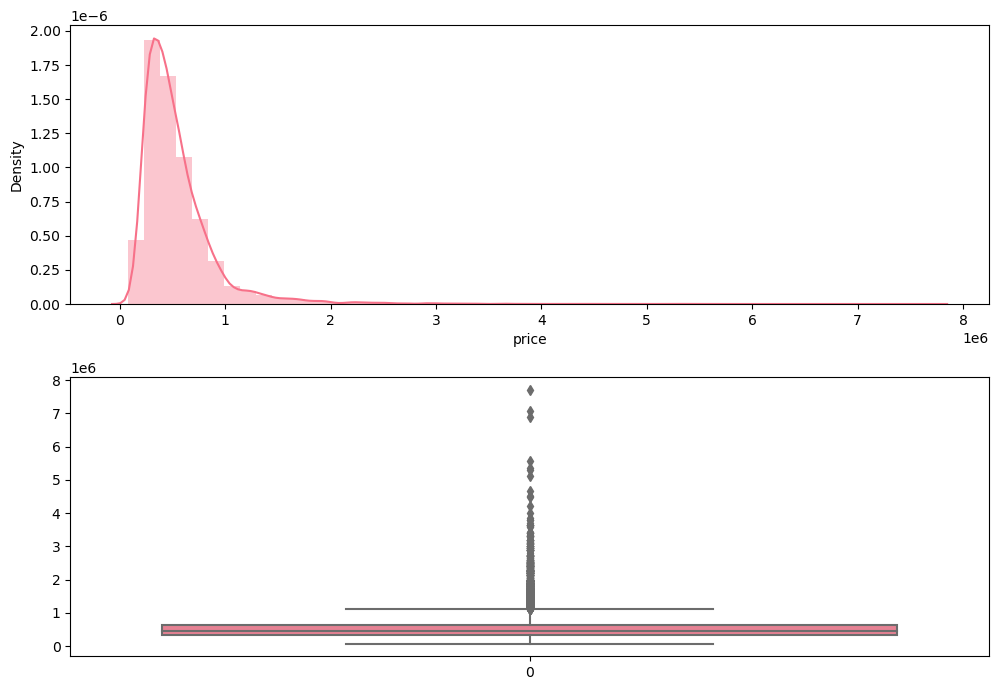

In [36]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(house['price'])
fig.add_subplot(2,1,2)
sns.boxplot(house['price'])
plt.tight_layout()

<Axes: >

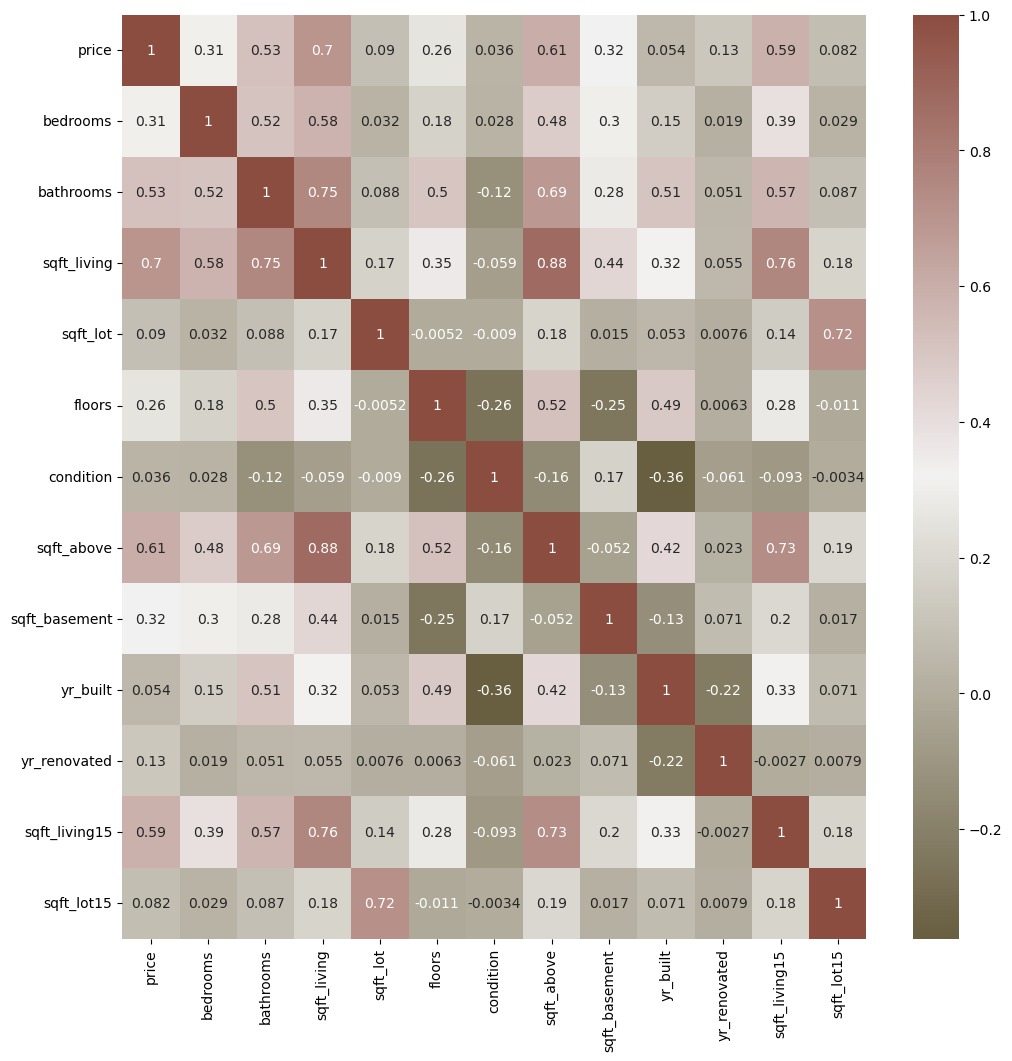

In [72]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [73]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
#read the above topics

In [60]:
house.price.mean()


540182.1587933188

In [61]:
house.price.std()

367362.23171800975

In [62]:
upper_limit=label_data.price.mean() + 3* label_data.price.std() 
lower_limit=label_data.price.mean() - 3* label_data.price.std() 
print("Upper Limit:",upper_limit)
print("Lower Limit:",lower_limit)

Upper Limit: 1642268.853947348
Lower Limit: -561904.5363607104


In [63]:
label_data.loc[(label_data.price <= upper_limit) | (label_data.price >= lower_limit)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,3,1530,0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,3,2310,0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,3,1020,0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,3,1600,0,2004,0,1410,1287


In [64]:
new_label_data=label_data.loc[(label_data.price < upper_limit) & (label_data.price > lower_limit)]
print("Before Removing outliers:",len(label_data))
print("After Removing outliers:",len(new_label_data))
print("Outliers:",len(label_data)-len(new_label_data))

Before Removing outliers: 21613
After Removing outliers: 21207
Outliers: 406


In [65]:
# Assigning the featurs as X and trarget as y
X= new_label_data.drop(["price"],axis =1)
y= new_label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)
#split the data into training and test
# 0.25 test data and 0.75 training



In [66]:
# Tue we will discuss what this fit does cost (or) loss function


regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
# set rows in X inputs and SAME mapping set of rows in Y
#75% rows of X and 75% rows of Y

#y = mx + c
#intercept = c when x = 0
#y = c



LinearRegression()

In [67]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for bedrooms is -34208.57355417553
The coefficient for bathrooms is 49677.476505956016
The coefficient for sqft_living is 102.23275412449402
The coefficient for sqft_lot is 0.09123470973281655
The coefficient for floors is 77538.00556531498
The coefficient for condition is 19420.81244164345
The coefficient for sqft_above is 37.64386786826617
The coefficient for sqft_basement is 64.58888601327271
The coefficient for yr_built is -2656.7553534318918
The coefficient for yr_renovated is 20.39971702800989
The coefficient for sqft_living15 is 114.83793294959924
The coefficient for sqft_lot15 is -0.37341914321950753


In [68]:
intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 5057048.219872544


In [69]:
regression_model.score(X_train, y_train)
#When I use the coefficient I get some predicted values for each of the rows
#actual values

0.5483754976696256

In [70]:
regression_model.score(X_test, y_test)

0.5364868544714676

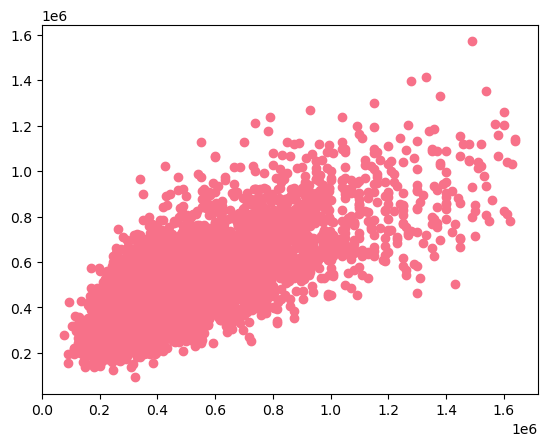

In [76]:
y_pred = regression_model.predict(X_test)
plt.scatter(y_test, y_pred)
#y_test and y_pred value close to each other.

In [75]:
print('MAE:' , metrics.mean_absolute_error(y_test,y_pred))
print('MSE:' , metrics.mean_squared_error(y_test,y_pred))
print('RMSE:' ,np.sqrt( metrics.mean_squared_error(y_test,y_pred)))

MAE: 130233.9784659238
MSE: 30175370988.65167
RMSE: 173710.5954990992
